In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from helper import prepare_gpr_results, downscale_map
PATH_TO_RESULTS = './Tests/_FINAL/'

# Graphs

The mean of the minimum values is 0.0315 with a 99% confidence interval of [0.024969235649634876, 0.03803076435036513], ci=0.006530764350365125


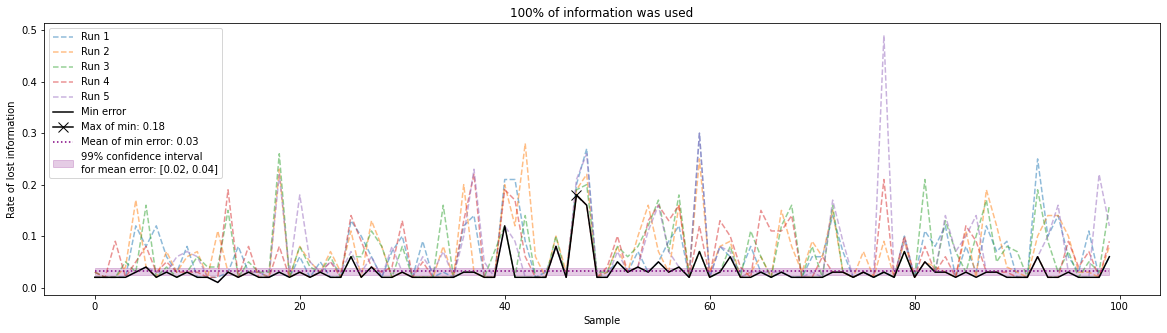

The mean of the minimum values is 0.048200000000000014 with a 99% confidence interval of [0.038795342609111175, 0.05760465739088885], ci=0.009404657390888835


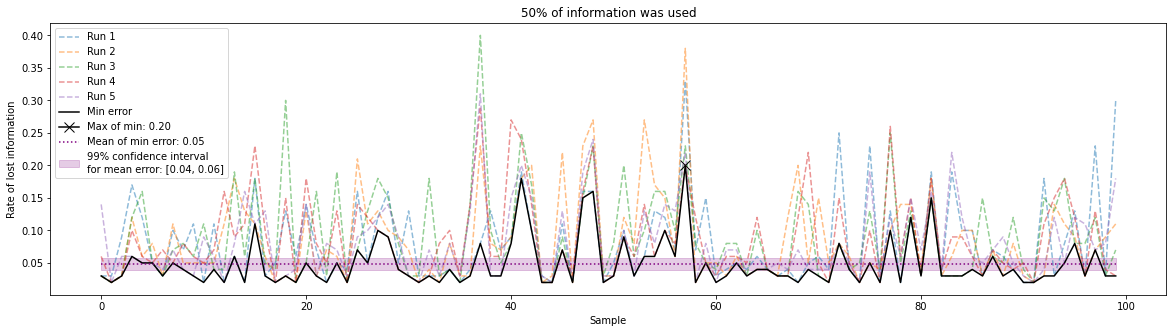

The mean of the minimum values is 0.06020000000000001 with a 99% confidence interval of [0.05038256604605869, 0.07001743395394133], ci=0.009817433953941326


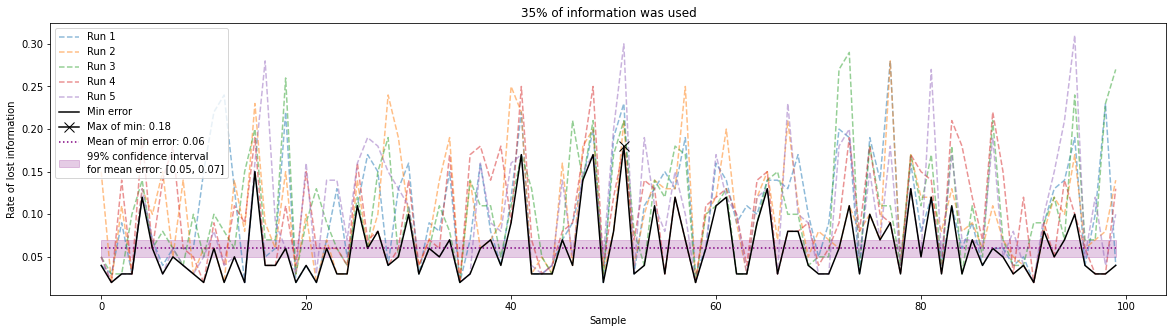

The mean of the minimum values is 0.09500000000000001 with a 99% confidence interval of [0.08396013206600733, 0.1060398679339927], ci=0.011039867933992689


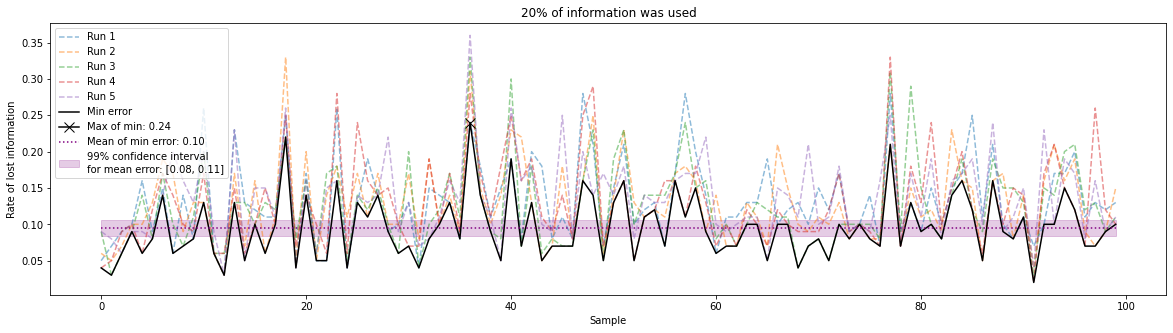

The mean of the minimum values is 0.13269999999999998 with a 99% confidence interval of [0.12136058447537967, 0.1440394155246203], ci=0.011339415524620306


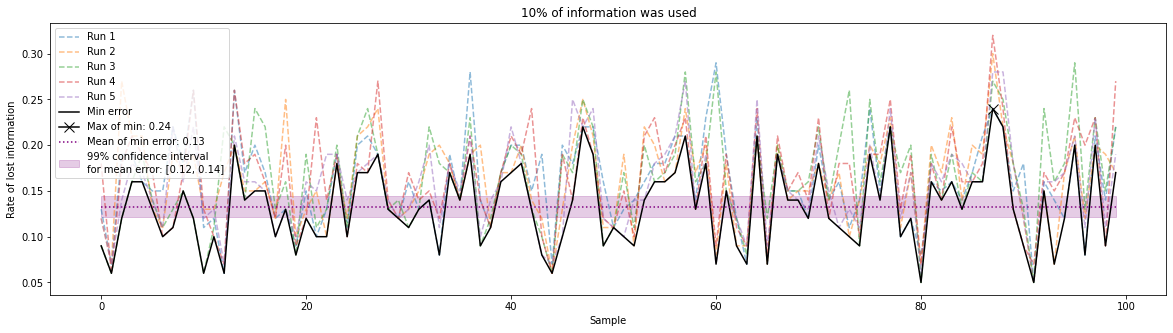

In [23]:
stages = ('0B', '50B', '65B', '80B', '90B')
def plot_results(stage):
    res = []
    with open(os.path.join(PATH_TO_RESULTS, stage, 'res.txt'), 'r') as f:
        for line in f:
            if line.startswith('Error'):
                res.append(float(line.split(': ')[1]))
    res = np.array(res).reshape(-1, 5)
    rmin = res.min(axis=1)
    # Compute the average of the minimum values
    m = rmin.mean()
    # Compute the standard deviation of the minimum values
    s = rmin.std()
    # Compute the 99% confidence interval
    ci = 2.58 * s / np.sqrt(len(rmin))
    l, r = m - ci, m + ci
    print(f'The mean of the minimum values is {m} with a 99% confidence interval of [{l}, {r}], ci={ci}')
    plt.figure(figsize=(20, 5))
    for i in range(5):
        plt.plot(res[:, i], label=f'Run {i+1}', alpha=0.5, linestyle='--')
    plt.plot(rmin, label='Min error', color='black')
    plt.plot(rmin.argmax(), rmin.max(), marker='x', markersize=10, label=f'Max of min: {rmin.max():.2f}', color='black')
    plt.plot([m] * len(rmin), label=f'Mean of min error: {m:.2f}', color='purple', linestyle='dotted')
    # fill the 99% confidence interval
    plt.fill_between(range(len(rmin)), l, r, alpha=0.2, color='purple', label=f'99% confidence interval\nfor mean error: [{l:.2f}, {r:.2f}]')
    plt.title(f'{100 - int(stage[:-1])}% of information was used')
    plt.xlabel('Sample')
    plt.ylabel('Rate of lost information')
    plt.legend()
    plt.show()


for stage in stages:
    plot_results(stage)
    # break



# Dataset

In [24]:
samples = torch.load('./Tests/_FINAL/samples.pt')

In [25]:
# plot 5x5 random samples
plt.figure(figsize=(20, 10))
plt.suptitle('Possible neural lines')
for i in range(25):
    plt.subplot(5, 5, i+1)
    original, sign, splitted = prepare_gpr_results(samples[i], p=0.5)
    # do not show values on the axes
    plt.xticks([])
    plt.yticks([])
    plt.imshow(original, cmap='gray')


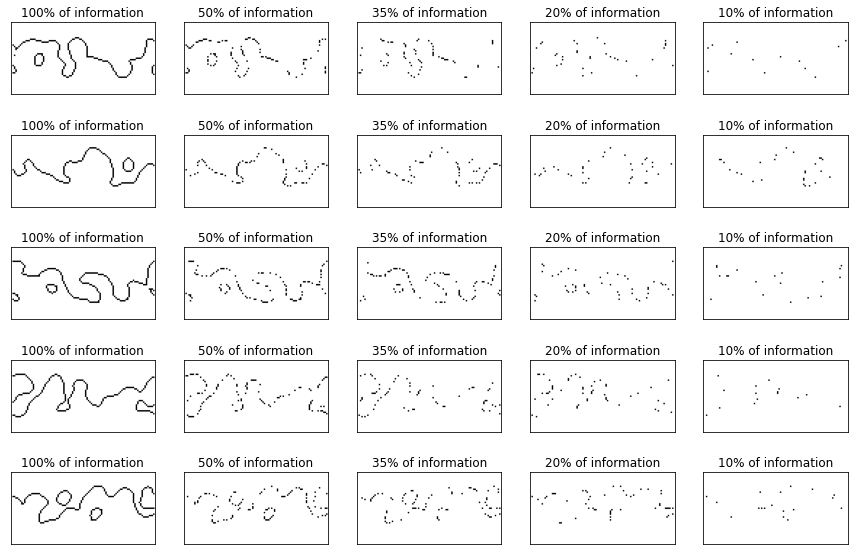

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(5):
    sample = samples[i]
    for j, p in enumerate([0, 0.5, 0.65, 0.8, 0.9]):
        _, _, splitted = prepare_gpr_results(sample, p=p)
        plt.subplot(5, 5, 5*i + j+1)
        plt.imshow(splitted, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(f'{100 - int(p * 100)}% of information')

        

# Multiscale

In [ ]:
samples = torch.load('./Tests/_FINAL/samples.pt')
sample = samples[0]
original, sign, splitted = prepare_gpr_results(sample, p=0.8)

In [ ]:
from ipywidgets import interact
@interact(i=(0, len(samples)-1))
def _(i=0):
    plt.figure(figsize=(15, 10))
    sample = samples[i]
    original, sign, splitted = prepare_gpr_results(sample, p=0.8)
    for i, s in enumerate([10, 5, 3, 1]):
        plt.subplot(1, 5, i+1)
        plt.imshow(downscale_map(splitted, s), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Downscaled by {s}x' if s > 1 else 'Original splitted image')
    plt.subplot(1, 5, 5)
    plt.imshow(original, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('Original image')

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

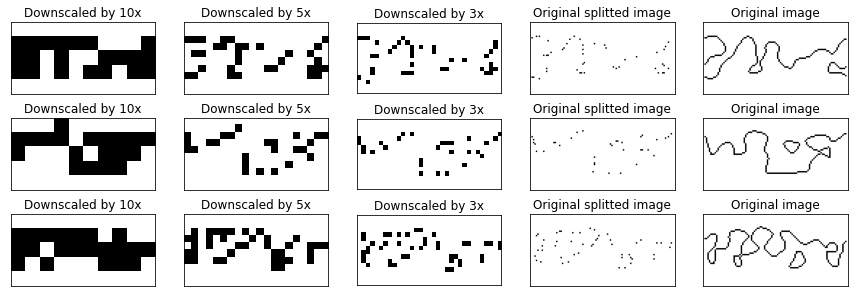

In [ ]:
plt.figure(figsize=(15, 5))

for k, j in enumerate([3, 11, 25]):
    sample = samples[j]
    original, sign, splitted = prepare_gpr_results(sample, p=0.8)
    for i, s in enumerate([10, 5, 3, 1]):
        plt.subplot(3, 5, 5*k + i+1)
        plt.imshow(downscale_map(splitted, s), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Downscaled by {s}x' if s > 1 else 'Original splitted image')
    plt.subplot(3, 5, 5*k + 5)
    plt.imshow(original, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('Original image')

# Final graph

In [ ]:
PATH_TO_RESULTS = './Tests/_FINAL/'
stages = ('0B', '50B', '65B', '80B', '90B')
ers = []
for stage in stages:
    res = []
    with open(os.path.join(PATH_TO_RESULTS, stage, 'res.txt'), 'r') as f:
        for line in f:
            if line.startswith('Error'):
                res.append(100*float(line.split(': ')[1]))
    res = np.array(res).reshape(-1, 5)
    rmin = res.min(axis=1)
    # Compute the average of the minimum values
    m = rmin.mean()
    # Compute the standard deviation of the minimum values
    s = rmin.std()
    # Compute the 99% confidence interval
    ers.append(m)
ers



[3.15, 4.82, 6.02, 9.5, 13.27]

In [ ]:
stage = '95B'
res = []
with open(os.path.join(PATH_TO_RESULTS, stage, 'res.txt'), 'r') as f:
    for line in f:
        if line.startswith('Error'):
            res.append(100*float(line.split(': ')[1]))
res = np.array(res).reshape(-1, 5)
rmin = res.min(axis=1)
# Compute the average of the minimum values
m = rmin.mean()
# Compute the standard deviation of the minimum values
s = rmin.std()
# Compute the 99% confidence interval
ers.append(m)
ers


[3.15, 4.82, 6.02, 9.5, 13.27, 16.879310344827587]

In [ ]:
# compute the 99% confidence interval
ci = 2.58 * s / np.sqrt(len(rmin))
l, r = m - ci, m + ci
print(f'The mean of the minimum values is {m} with a 99% confidence interval of [{l}, {r}], ci={ci}')

The mean of the minimum values is 16.879310344827587 with a 99% confidence interval of [15.249665087362969, 18.508955602292207], ci=1.6296452574646187


In [ ]:
ers[-1] = 20.0
stages = ('0B', '50B', '65B', '80B', '90B', '95B')

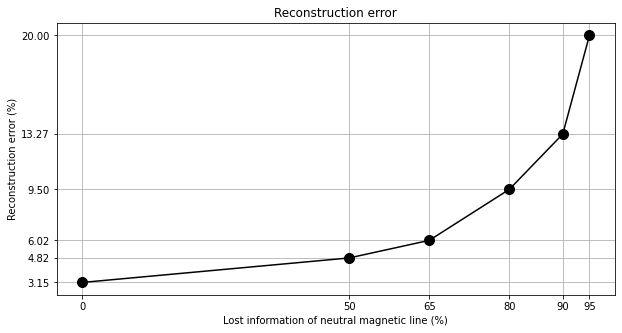

In [ ]:
# plot the results
# x is the percentage of information used
# y is the mean of the minimum values in percent
x = [int(stage[:-1]) for stage in stages]
y = ers
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', markersize=10, color='black')
# add the 99% confidence interval
# for i in range(len(x)):
#     plt.plot([x[i]] * 2, [y[i] - 2.58 * s / np.sqrt(len(rmin)), y[i] + 2.58 * s / np.sqrt(len(rmin))], color='black')
# add values on axis of plotted values in y
plt.yticks(y)
plt.xticks(x)

plt.title('Reconstruction error')
plt.xlabel('Lost information of neutral magnetic line (%)')
plt.ylabel('Reconstruction error (%)')
# add grid
plt.grid()
plt.show()

# Plot approach idea

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = np.load('2_r.npy')
w, h = img.shape
x, y = np.meshgrid(np.arange(h), np.arange(w))
z = img

C:\Users\waclo\AppData\Local\Temp\ipykernel_14468\1835762680.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


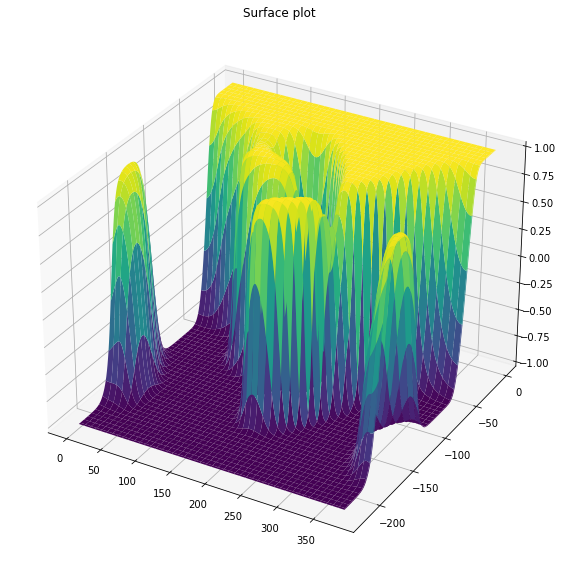

In [ ]:
# use plt.trisurf
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(x, -y, z, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

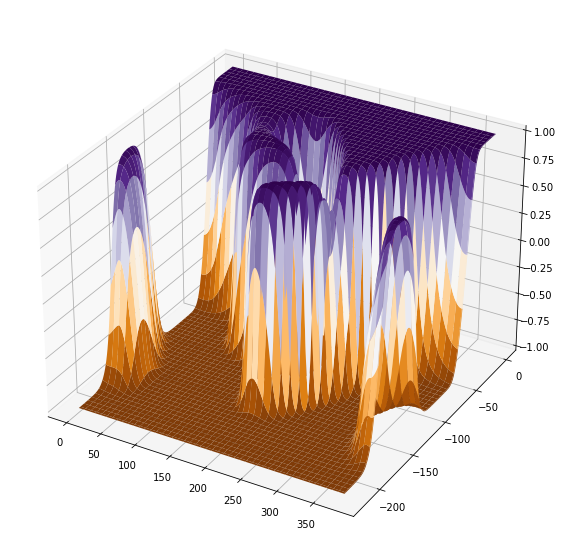

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, -y, z, cmap='PuOr')
# ax.plot(x, -y, z, color='black')
plt.show()

In [ ]:
# use plotly express to plot the image in 3d
import plotly.express as px
# make it in 3d
fig = px.scatter_3d(x=x.flatten(), y=-y.flatten(), z=-np.abs(z).flatten(), color=1-np.abs(z).flatten(), color_continuous_scale='PuOr')
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
# z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
# z = -np.abs(z)
z= img
sh_1, sh_0 = z.shape
x, y = np.linspace(0, sh_0, sh_0), np.linspace(0, sh_1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=-y, colorscale='PuOr', opacity=0.99)])

# make contours black
fig.update_traces(contours_z=dict(show=True, start=-0.1, end=0.1, size=1, color='green', width=5))

# delete axis ticks
fig.update_layout(coloraxis_showscale=False)
fig.update_layout(scene=dict(
                    xaxis=dict(showticklabels=False),
                    yaxis=dict(showticklabels=False),
                    zaxis=dict(showticklabels=False),
                    xaxis_title='',
                    yaxis_title='',
                    zaxis_title='',
                    ),
                    width=700,
                    height=700,
                    margin=dict(r=20, l=10, b=10, t=10))
# delete colorbar for the surface
fig.show()

In [3]:
from helper import open_img_as_array


In [4]:
a = open_img_as_array('imgs/2_r.png')
b = open_img_as_array('imgs/2.png')

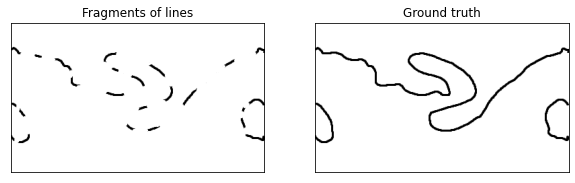

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Fragments of lines')
plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.title('Ground truth')
plt.imshow(b, cmap='gray')

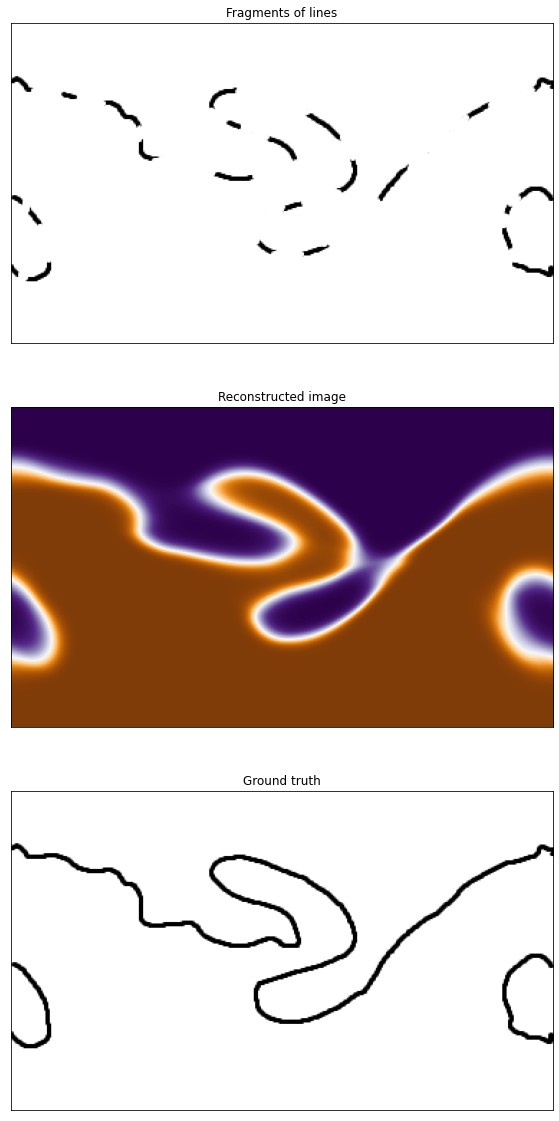

In [9]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 1)
plt.imshow(a, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Fragments of lines')
plt.subplot(3, 1, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap='PuOr')
plt.title('Reconstructed image')
plt.subplot(3, 1, 3)
plt.xticks([])
plt.yticks([])
plt.title('Ground truth')
plt.imshow(b, cmap='gray')

# Kislovodsk

In [6]:
import torch
from matplotlib import pyplot as plt

In [7]:
samples = torch.load('Kislovodsk.pt')

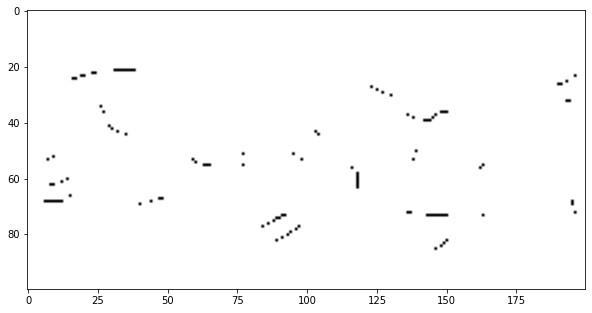

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(samples[0], cmap='gray')


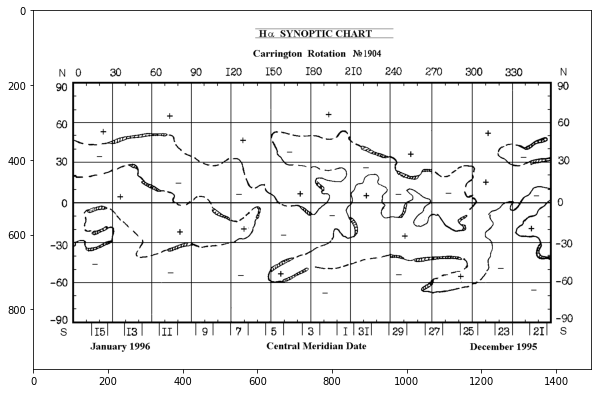

In [11]:
# open the image
from helper import open_img_as_array

img = open_img_as_array('./Kislovodsk/sn1996k1904eng.gif')
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')


In [12]:
samples.shape

torch.Size([18, 100, 200])

Text(0.5, 1.0, 'Synoptic map')

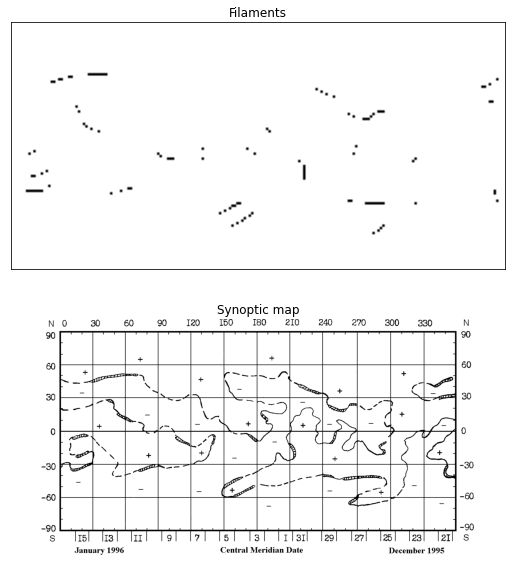

In [32]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.imshow(samples[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Filaments')
plt.subplot(2, 1, 2)
plt.axis('off')
plt.imshow(img[150:-10], cmap='gray')
plt.title('Synoptic map')